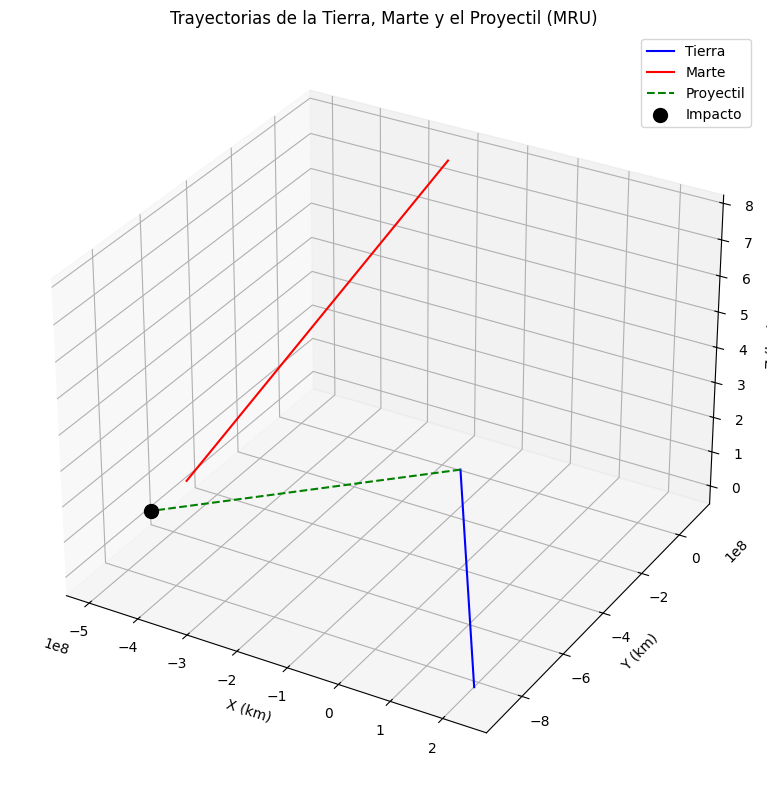

Posición del proyectil en t = 1.00 años: [-4.94396337e+08 -7.07027182e+08  6.93116859e+05]
Posición de Marte en t = 1.00 años: [-4.94395228e+08 -5.46736680e+08  6.94932021e+05]
Diferencia: 160290501.82 km (debe ser cercano a 0)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constantes
SECONDS_IN_YEAR = 3.15576e7  # segundos en un año
MAX_TIME = 10 * SECONDS_IN_YEAR  # tiempo máximo: 10 años
IMPACT_TIME = 1.0 * SECONDS_IN_YEAR  # tiempo de impacto elegido (1 año)

# Datos iniciales (posición en km, velocidad en km/s)
# Tierra
r_T = np.array([-1.3112578338e8, -7.5507634192e7, 3.0425664795e4])
v_T = np.array([1.14330508015e1, -2.5964546881e1, 7.9941675023e-4])

# Marte
r_M = np.array([-2.309032186e8, 9.4520480368e7, 7.6662920456e6])
v_M = np.array([-8.3495579277e0, -2.0320213209e1, -2.2090906863e-1])

# Vector velocidad del proyectil (calculado previamente)
v_p = np.array([-22.9444, 5.9529, 0.0202])  # km/s

# Velocidad inicial del proyectil en el sistema baricéntrico
v_p0 = v_T + v_p

# Función para calcular posiciones en MRU
def position(t, r0, v):
    return r0 + v * t

# Generar puntos en el tiempo
t_values = np.linspace(0, IMPACT_TIME, 1000)  # desde t=0 hasta el impacto

# Calcular trayectorias
earth_traj = np.array([position(t, r_T, v_T) for t in t_values])
mars_traj = np.array([position(t, r_M, v_M) for t in t_values])
projectile_traj = np.array([position(t, r_T, v_p0) for t in t_values])

# Gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar trayectorias
ax.plot(earth_traj[:, 0], earth_traj[:, 1], earth_traj[:, 2], label='Tierra', color='blue')
ax.plot(mars_traj[:, 0], mars_traj[:, 1], mars_traj[:, 2], label='Marte', color='red')
ax.plot(projectile_traj[:, 0], projectile_traj[:, 1], projectile_traj[:, 2],
        label='Proyectil', color='green', linestyle='--')

# Punto de impacto
impact_point = projectile_traj[-1]
ax.scatter(impact_point[0], impact_point[1], impact_point[2], color='black', s=100, label='Impacto')

# Configuración del gráfico
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('Trayectorias de la Tierra, Marte y el Proyectil (MRU)')
ax.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Verificar impacto
print(f"Posición del proyectil en t = {IMPACT_TIME / SECONDS_IN_YEAR:.2f} años: {projectile_traj[-1]}")
print(f"Posición de Marte en t = {IMPACT_TIME / SECONDS_IN_YEAR:.2f} años: {mars_traj[-1]}")
print(f"Diferencia: {np.linalg.norm(projectile_traj[-1] - mars_traj[-1]):.2f} km (debe ser cercano a 0)")



